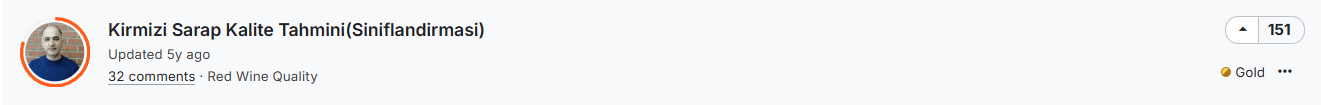

In [2]:
# Gerekli Kütüphaneleri Yüklenmesi Yapılıyor
import numpy as np # linear algebra
import pandas as pd # veri işleme

#Görselleştirme Kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

#Makine öğrenmesi gereçleri
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Makine öğrenmesi algoritmaları
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Performans metrikleri
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import imblearn
from imblearn.over_sampling import SMOTE
#Sistem kütüphaneleri
import os
import warnings


In [3]:
#Veri setinin yüklemesi yapılıyor 
dataset=pd.read_csv("../winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Kaç farklı kalite puanı olduğunu öğrenelim
print("Kalite puanları:",dataset['quality'].unique())

Kalite puanları: [5 6 7 4 8 3]


In [6]:
#Herbir kalite puanından kaçtane örnek olduğunu görelim
print(dataset['quality'].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


<Axes: ylabel='count'>

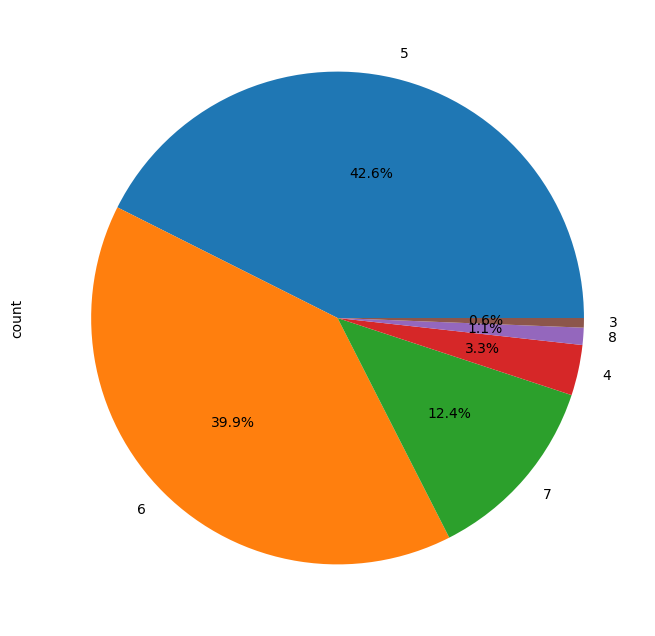

In [7]:
#kalite puanlarını pie grafikle göstrelim
plt.figure(1, figsize=(8,8))
dataset['quality'].value_counts().plot.pie(autopct="%1.1f%%")

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
selected_features=['residual sugar', 'total sulfur dioxide', 'sulphates',
                   'alcohol', 'volatile acidity', 'quality']
dataset_selected_features=dataset[selected_features]

In [10]:
condition1=(dataset_selected_features['quality']==3)|(dataset_selected_features['quality']==4)
condition2=(dataset_selected_features['quality']==5)|(dataset_selected_features['quality']==6)
condition3=(dataset_selected_features['quality']==7)|(dataset_selected_features['quality']==8)
level_34=round(dataset_selected_features[condition1].describe(),2)
level_56=round(dataset_selected_features[condition2].describe(),2)
level_78=round(dataset_selected_features[condition3].describe(),2)

In [11]:
level_all=pd.concat([level_34,level_56, level_78],
                    axis=1, 
                    keys=['Levels:3,4','Levels:5,6','Levels:7,8',])
level_all.T

count   mean    std   min    25%    50%  \
Levels:3,4 residual sugar          63.0   2.68   1.72  1.20   1.90   2.10   
           total sulfur dioxide    63.0  34.44  26.40  7.00  13.50  26.00   
           sulphates               63.0   0.59   0.22  0.33   0.50   0.56   
           alcohol                 63.0  10.22   0.92  8.40   9.60  10.00   
           volatile acidity        63.0   0.72   0.25  0.23   0.56   0.68   
           quality                 63.0   3.84   0.37  3.00   4.00   4.00   
Levels:5,6 residual sugar        1319.0   2.50   1.40  0.90   1.90   2.20   
           total sulfur dioxide  1319.0  48.95  32.71  6.00  24.00  40.00   
           sulphates             1319.0   0.65   0.17  0.37   0.54   0.61   
           alcohol               1319.0  10.25   0.97  8.40   9.50  10.00   
           volatile acidity      1319.0   0.54   0.17  0.16   0.41   0.54   
           quality               1319.0   5.48   0.50  5.00   5.00   5.00   
Levels:7,8 residual sugar         217.0   2.71   1.36  1.20   2.00   2.30   
           total sulfur dioxide   217.0  34.89  32.57  7.00  17.00  27.00   
           sulphates              217.0   0.74   0.13  0.39   0.65   0.74   
           alcohol                217.0  11.52   1.00  9.20  10.80  11.60   
           volatile acidity       217.0   0.41   0.14  0.12   0.30   0.37   
           quality                217.0   7.08   0.28  7.00   7.00   7.00   

                                   75%     max  
Levels:3,4 residual sugar         2.95   12.90  
           total sulfur dioxide  48.00  119.00  
           sulphates              0.60    2.00  
           alcohol               11.00   13.10  
           volatile acidity       0.88    1.58  
           quality                4.00    4.00  
Levels:5,6 residual sugar         2.60   15.50  
           total sulfur dioxide  65.00  165.00  
           sulphates              0.70    1.98  
           alcohol               10.90   14.90  
           volatile acidity       0.64    1.33  
           quality                6.00    6.00  
Levels:7,8 residual sugar         2.70    8.90  
           total sulfur dioxide  43.00  289.00  
           sulphates              0.82    1.36  
           alcohol               12.20   14.00  
           volatile acidity       0.49    0.92  
           quality                7.00    8.00

In [21]:
#Özelliklerin kalite puanları ile ilişkisini göstermek için kullanılacak
#çizim türleri
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    """
    dataset: Veri seti
    rows: Satır sayısı
    cols: sütün sayısı
    plot_type: Çizdirilecek grafik türü
    """
    
    #Veri setindeki sütünların isimleri alınıyor
    column_names=dataset.columns.values
    #Kaç tane sütün olduğu bulunuyor
    number_of_column=len(column_names)
    
    #Satır*sütün boyutlarında alt grafik içeren
    #matris oluşturuluyor. Matrisin genişliği:22 yüksekliği:16
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))
        # 定义一个颜色调色板列表
    palettes = ['husl', 'coolwarm', 'viridis', 'plasma', 'inferno', 'magma', 'cividis']

    counter=0# Çizimi yapılacak özelliğin column_names listesindeki indeks değerini tutuyor
    for i in range(rows):
        for j in range(cols):
            """
            i: satır numarasını tutuyor
            j: sütün numarasını tutuyor
            axarr[i][j]: Çizilen grafigin grafik matrisindeki yerini belirliyor
            """
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

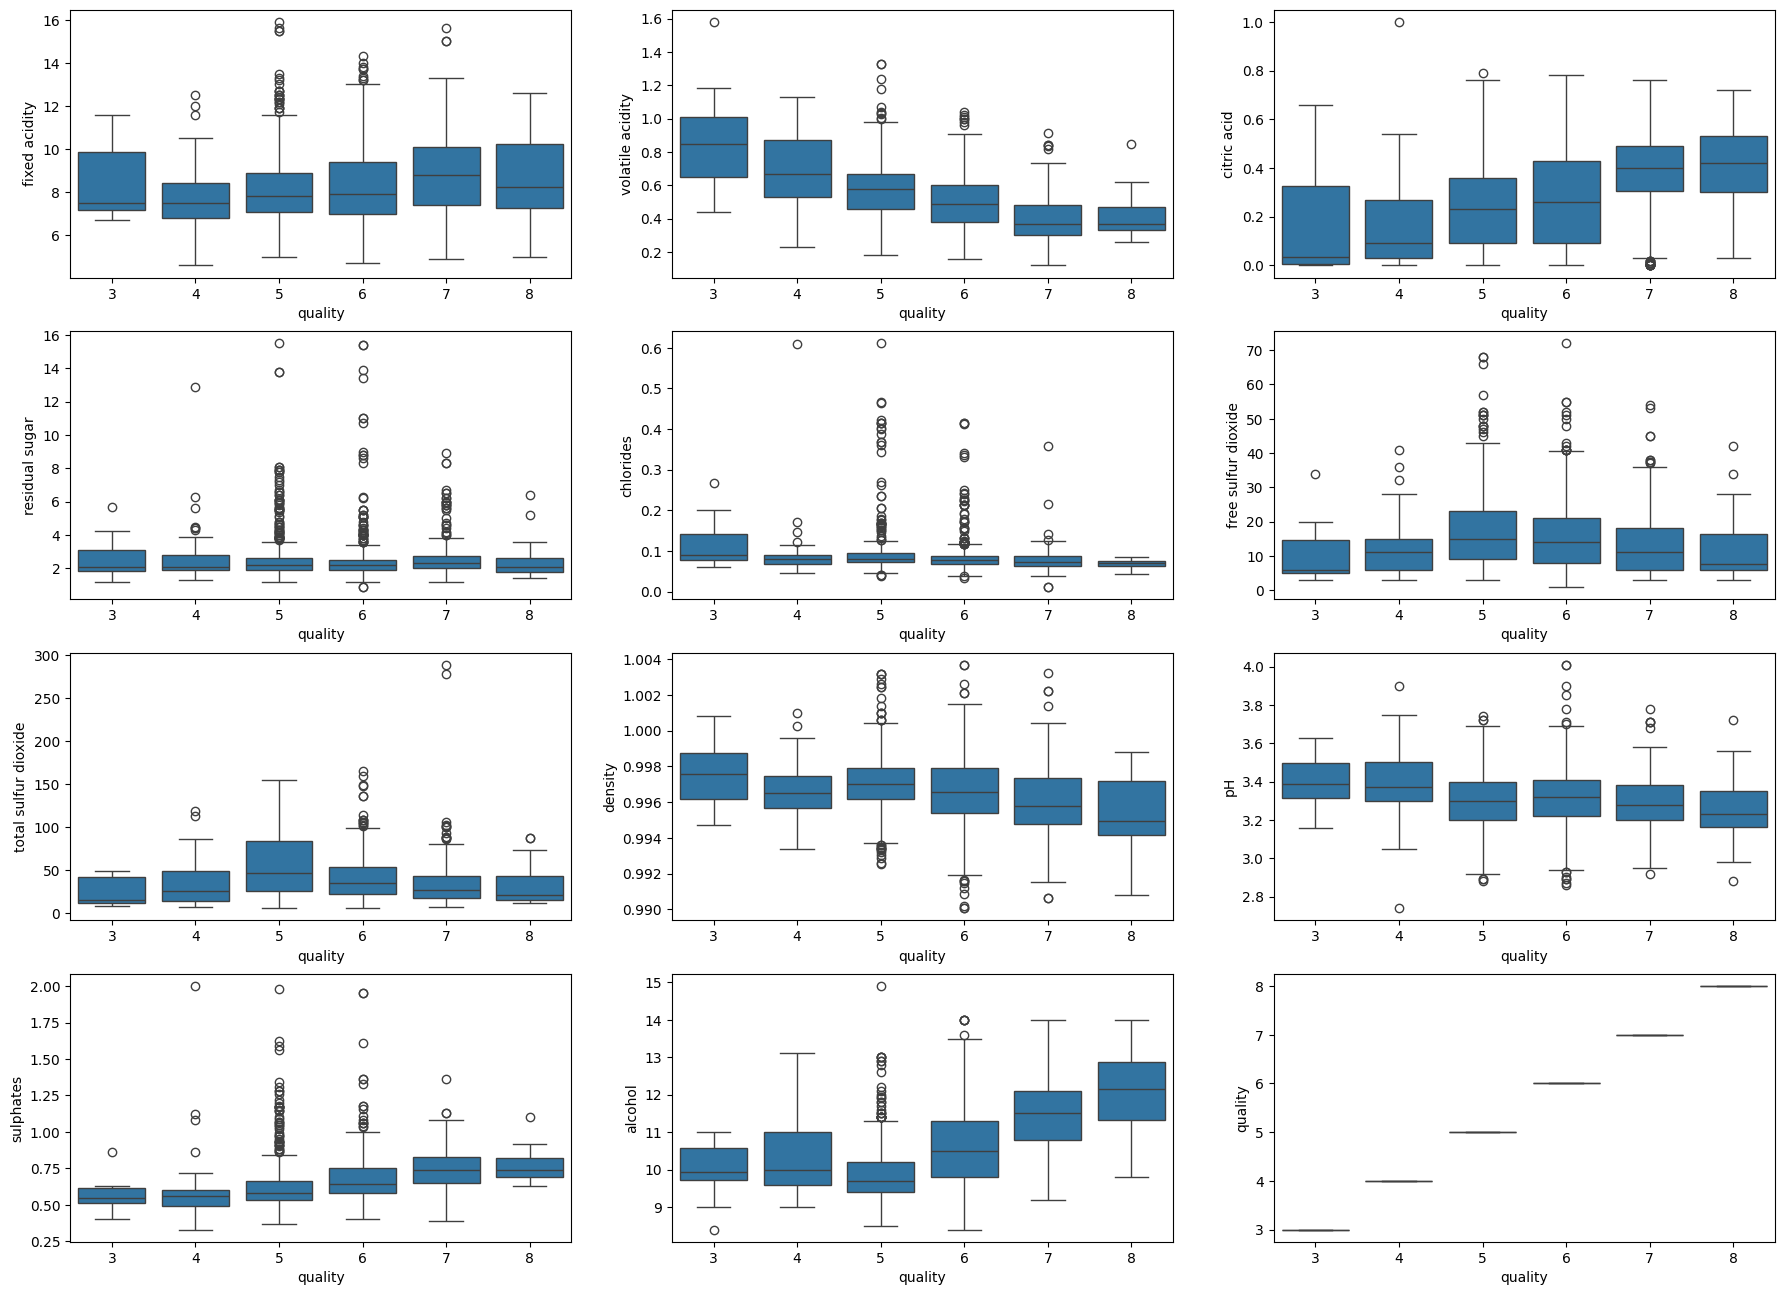

In [20]:
#Box Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"box")

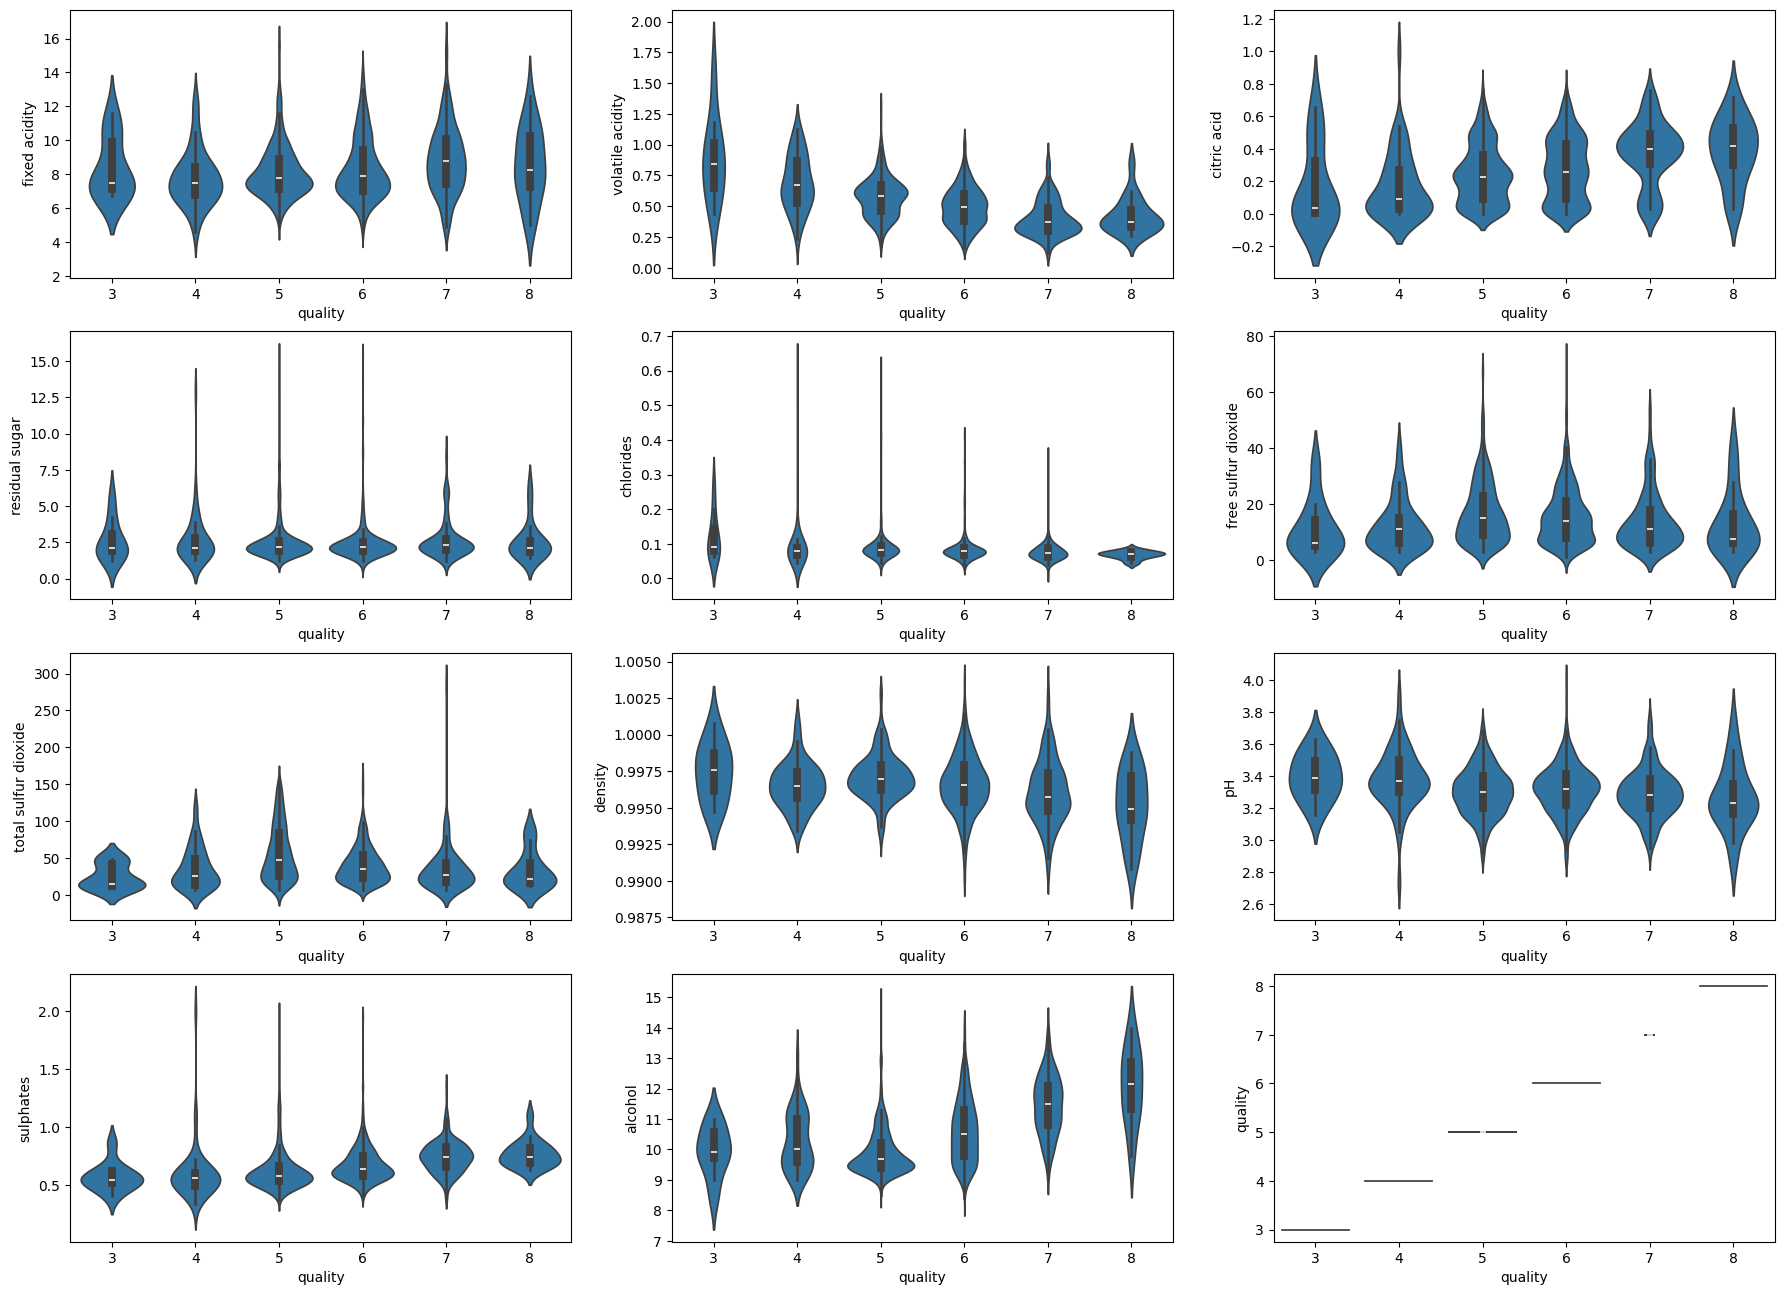

In [22]:
#Violin Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"violin")

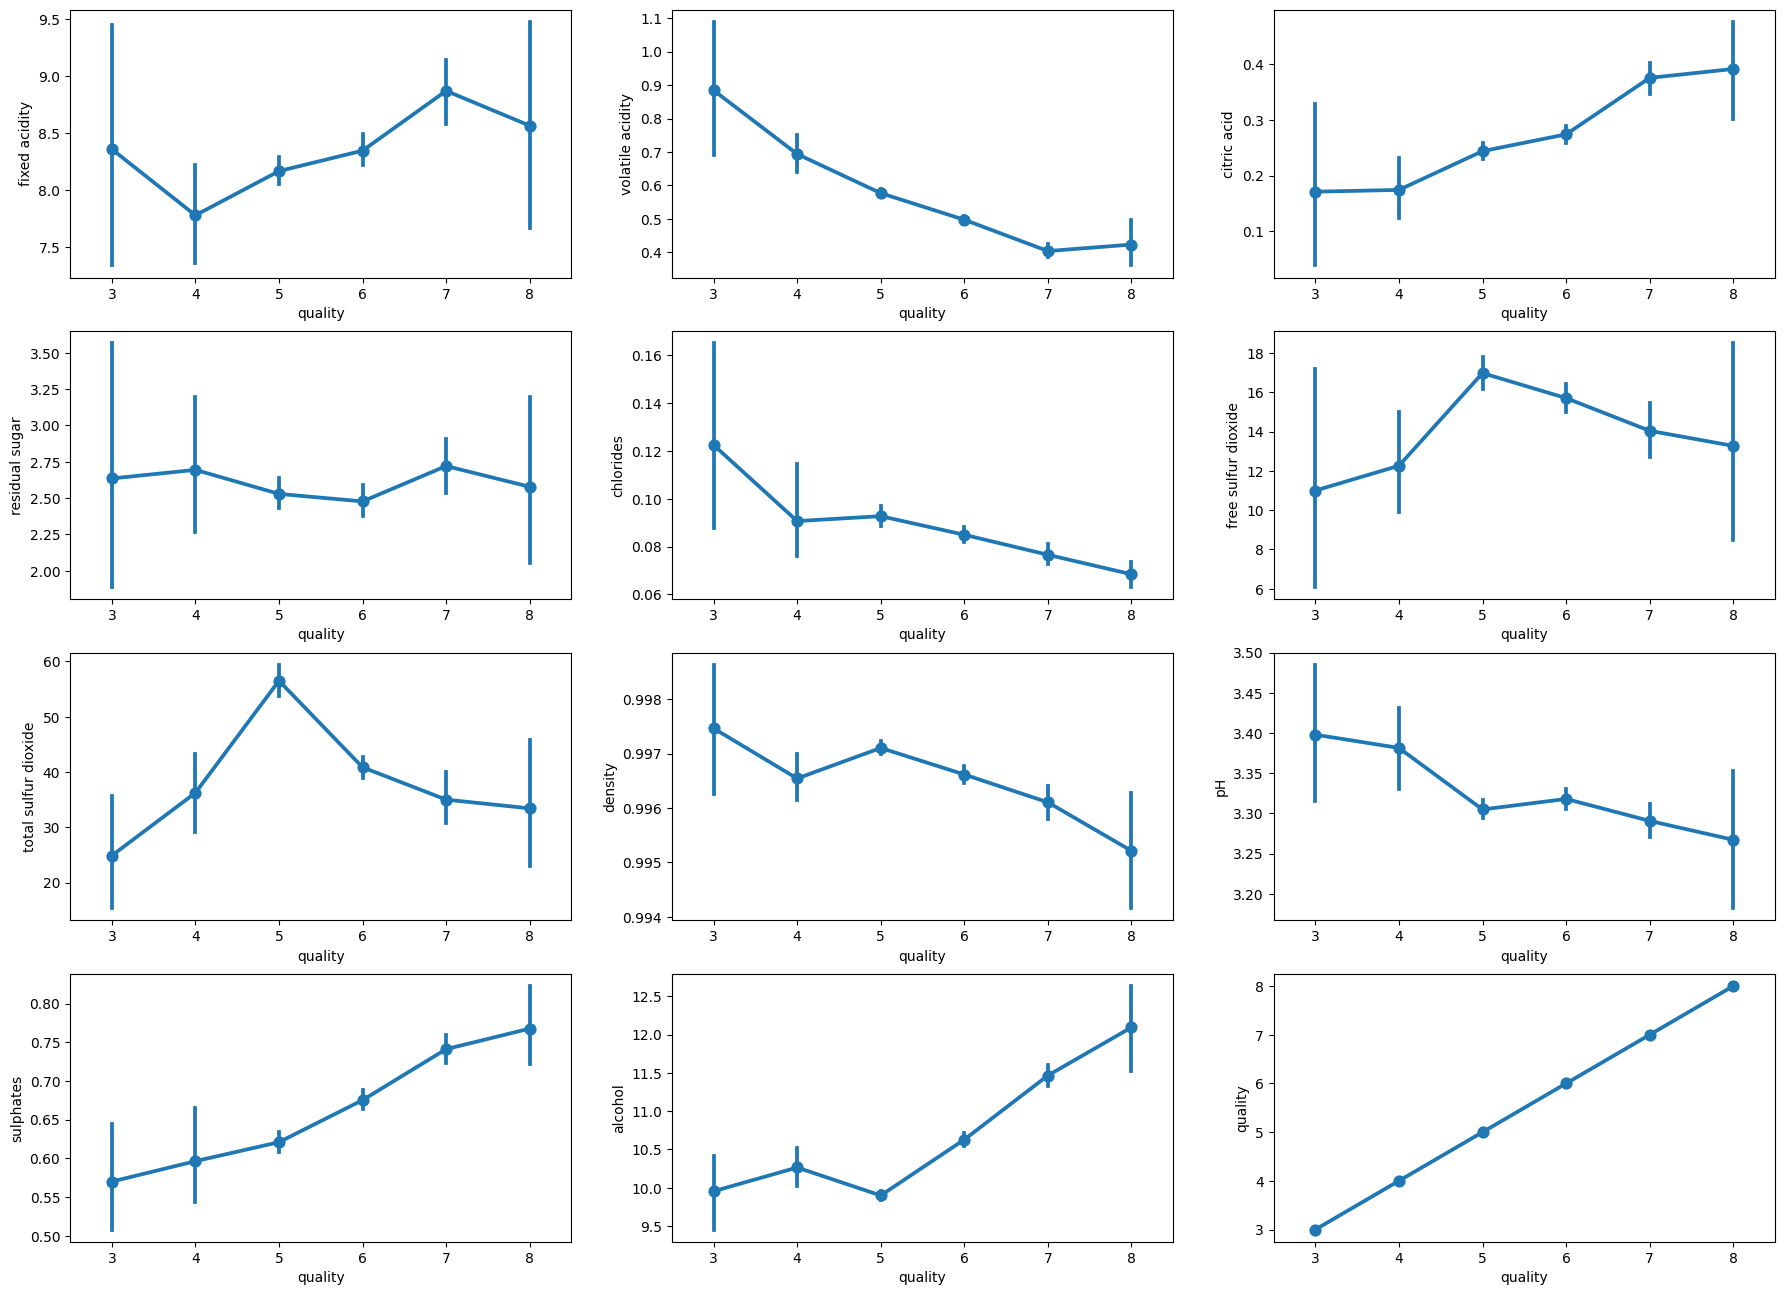

In [23]:
#Point Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"pointplot")

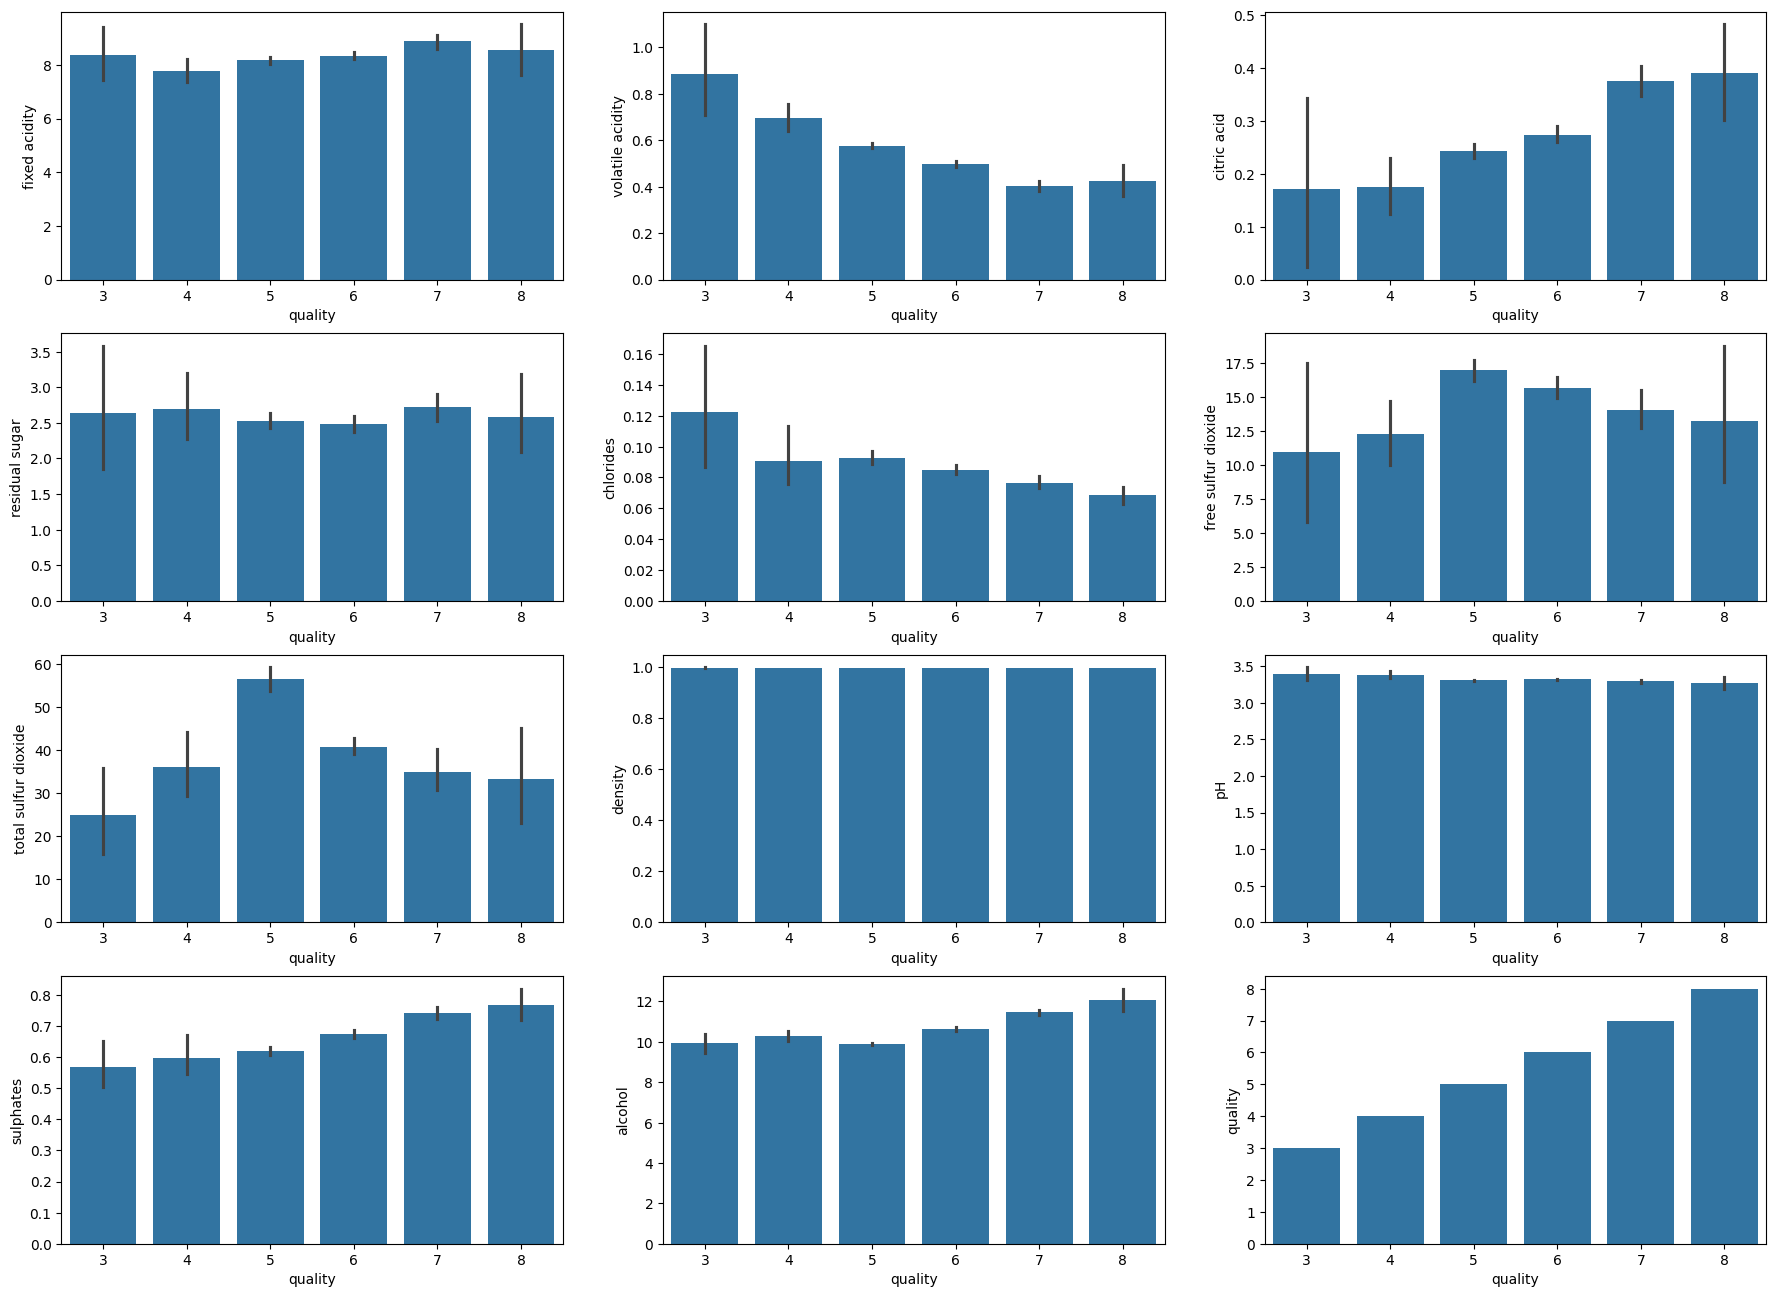

In [24]:
#Bar Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"bar")

In [25]:
def get_models():
    models=[]
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    models.append(("SVM linear",SVC(kernel='linear')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
    print("Çapraz Doğrulama Başarı Oranları".upper())
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("{} modelinin çapraz doğrulaması yapıldı, başarı oranı:{:0.2f}".format(name, cv_result.mean()))


In [26]:
dataset_temp=dataset.copy(deep=True)
X=dataset.drop('quality', axis=1)
y=dataset['quality']

X=StandardScaler().fit_transform(X)
cross_validation_scores_for_various_ml_models(X, y)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.60
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.55
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.58
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.62
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.62
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.58
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.59


In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

<Axes: title={'center': 'Herbir Kalite Seviyesinin Eğitim Kümesindeki Dağılımı'}, xlabel='kalite seviyesi'>

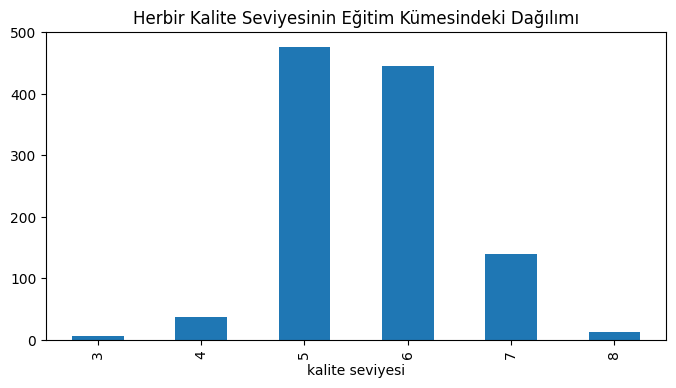

In [28]:
y_frame=pd.DataFrame()
y_frame['kalite seviyesi']=y_train
y_frame.groupby(['kalite seviyesi']).size().plot.bar(figsize=(8,4),
                                                     title="Herbir Kalite Seviyesinin Eğitim Kümesindeki Dağılımı")

<Axes: title={'center': 'Herbir Kalite Seviyesinin Test Kümesindeki Dağılımı'}, xlabel='kalite seviyesi'>

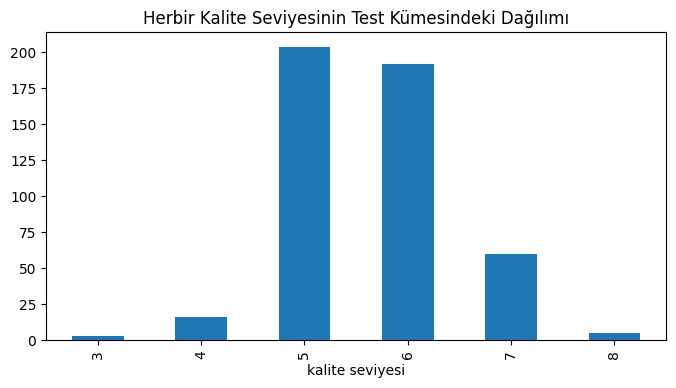

In [29]:
y_frame=pd.DataFrame()
y_frame['kalite seviyesi']=y_test
y_frame.groupby(['kalite seviyesi']).size().plot.bar(figsize=(8,4),title="Herbir Kalite Seviyesinin Test Kümesindeki Dağılımı")

In [30]:
def SVM_GridSearch(X_train, X_test, y_train, y_test):
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    
    for gamma in gammas:
        for C in Cs:
            svm=SVC(kernel='rbf',gamma=gamma, C=C)
            svm.fit(X_train, y_train)
            
            
            score=svm.score(X_test, y_test)
            
            if score>best_score:
                y_pred=svm.predict(X_test)
                best_score=score
                best_params={'C':C, 'gamma':gamma}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))

In [31]:
SVM_GridSearch(X_train, X_test, y_train, y_test)

best score: 0.6416666666666667
best params: {'C': 1, 'gamma': 1}
classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.67      0.79      0.72       204
           6       0.60      0.68      0.64       192
           7       0.71      0.28      0.40        60
           8       0.00      0.00      0.00         5

    accuracy                           0.64       480
   macro avg       0.33      0.29      0.29       480
weighted avg       0.61      0.64      0.61       480



In [32]:
dataset_temp.loc[(dataset_temp['quality']==3),'quality']=1
dataset_temp.loc[(dataset_temp['quality']==4),'quality']=1

dataset_temp.loc[(dataset_temp['quality']==5),'quality']=2
dataset_temp.loc[(dataset_temp['quality']==6),'quality']=2

dataset_temp.loc[(dataset_temp['quality']==7),'quality']=3
dataset_temp.loc[(dataset_temp['quality']==8),'quality']=3

In [33]:
dataset_temp['quality'].value_counts()

quality
2    1319
3     217
1      63
Name: count, dtype: int64

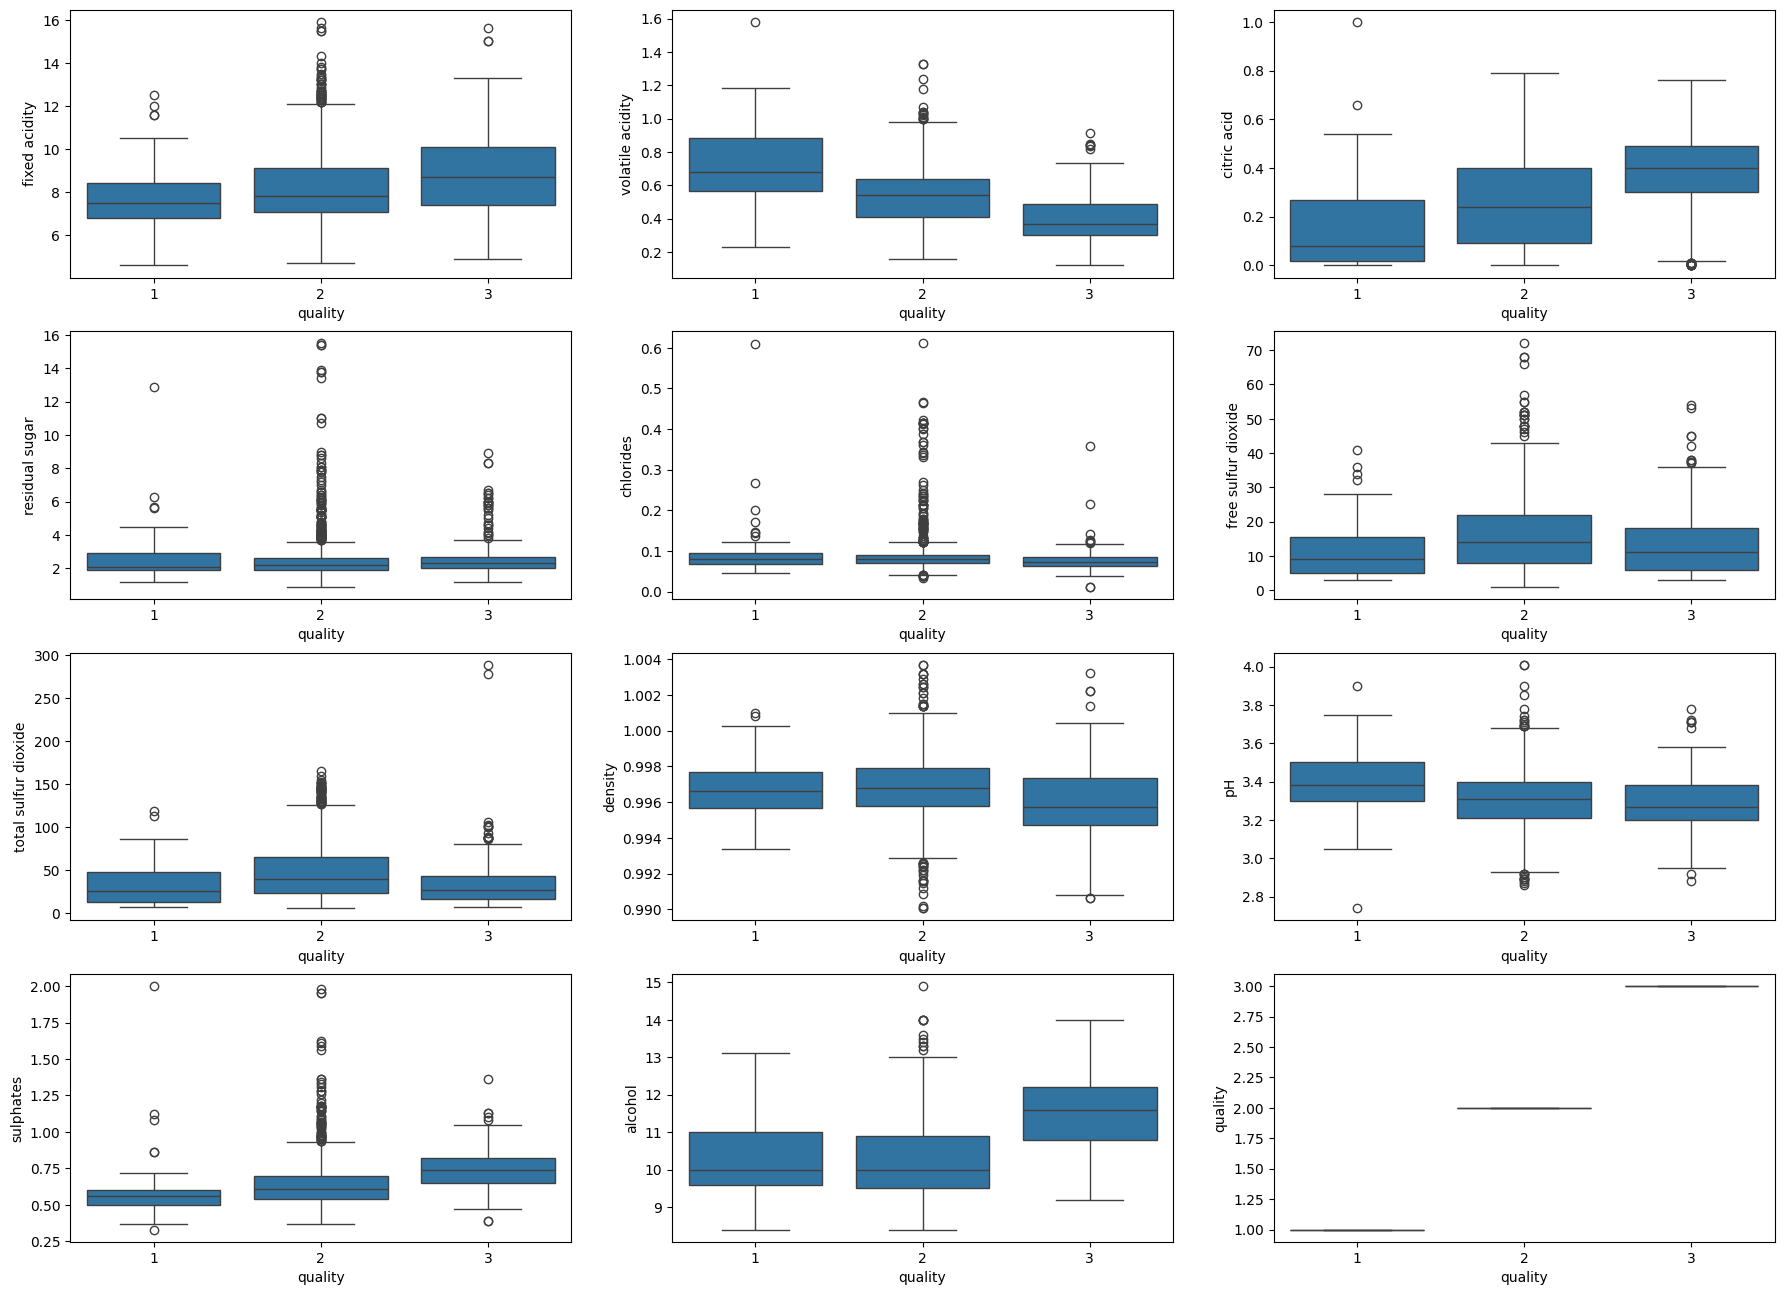

In [34]:
#Box Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"box")

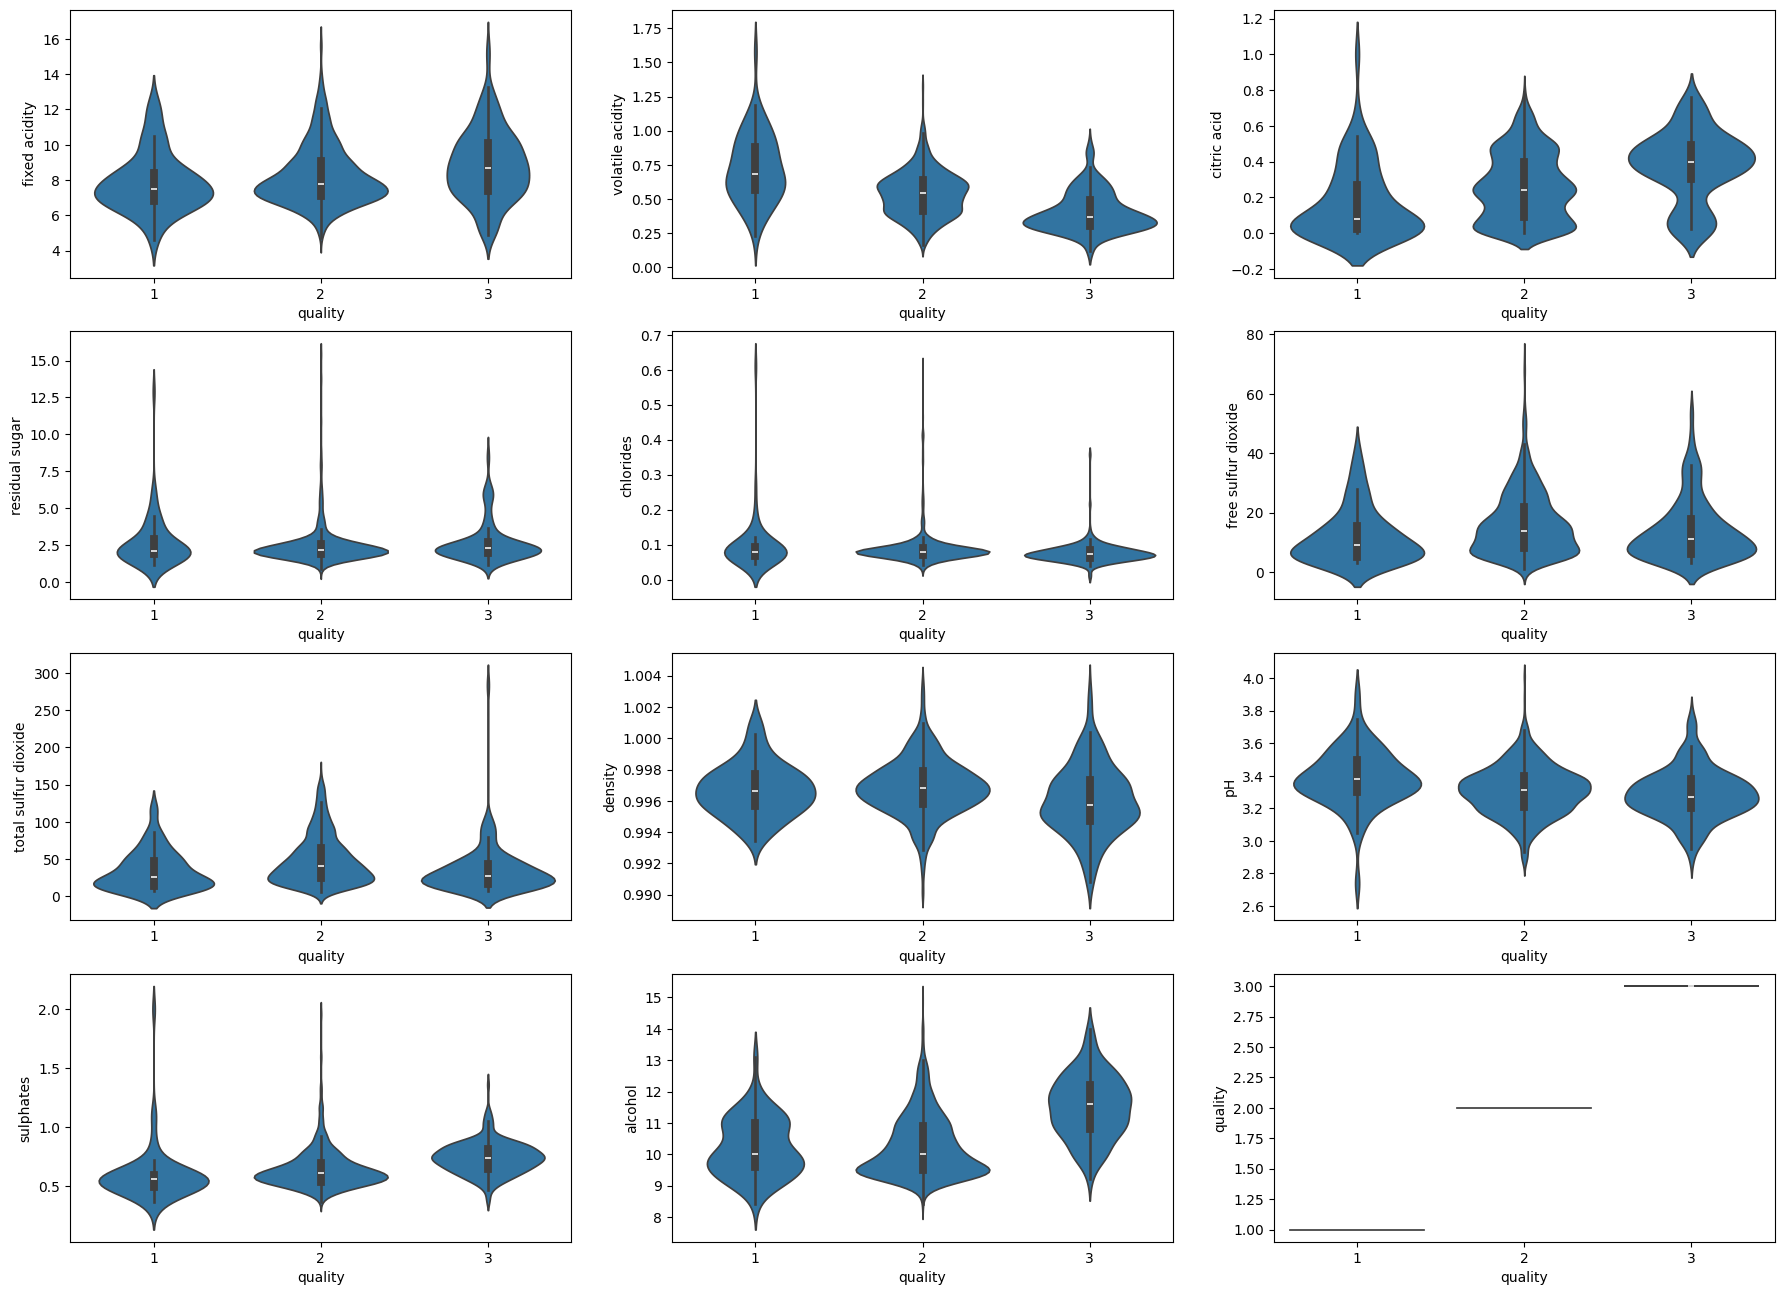

In [35]:
#Violin Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"violin")

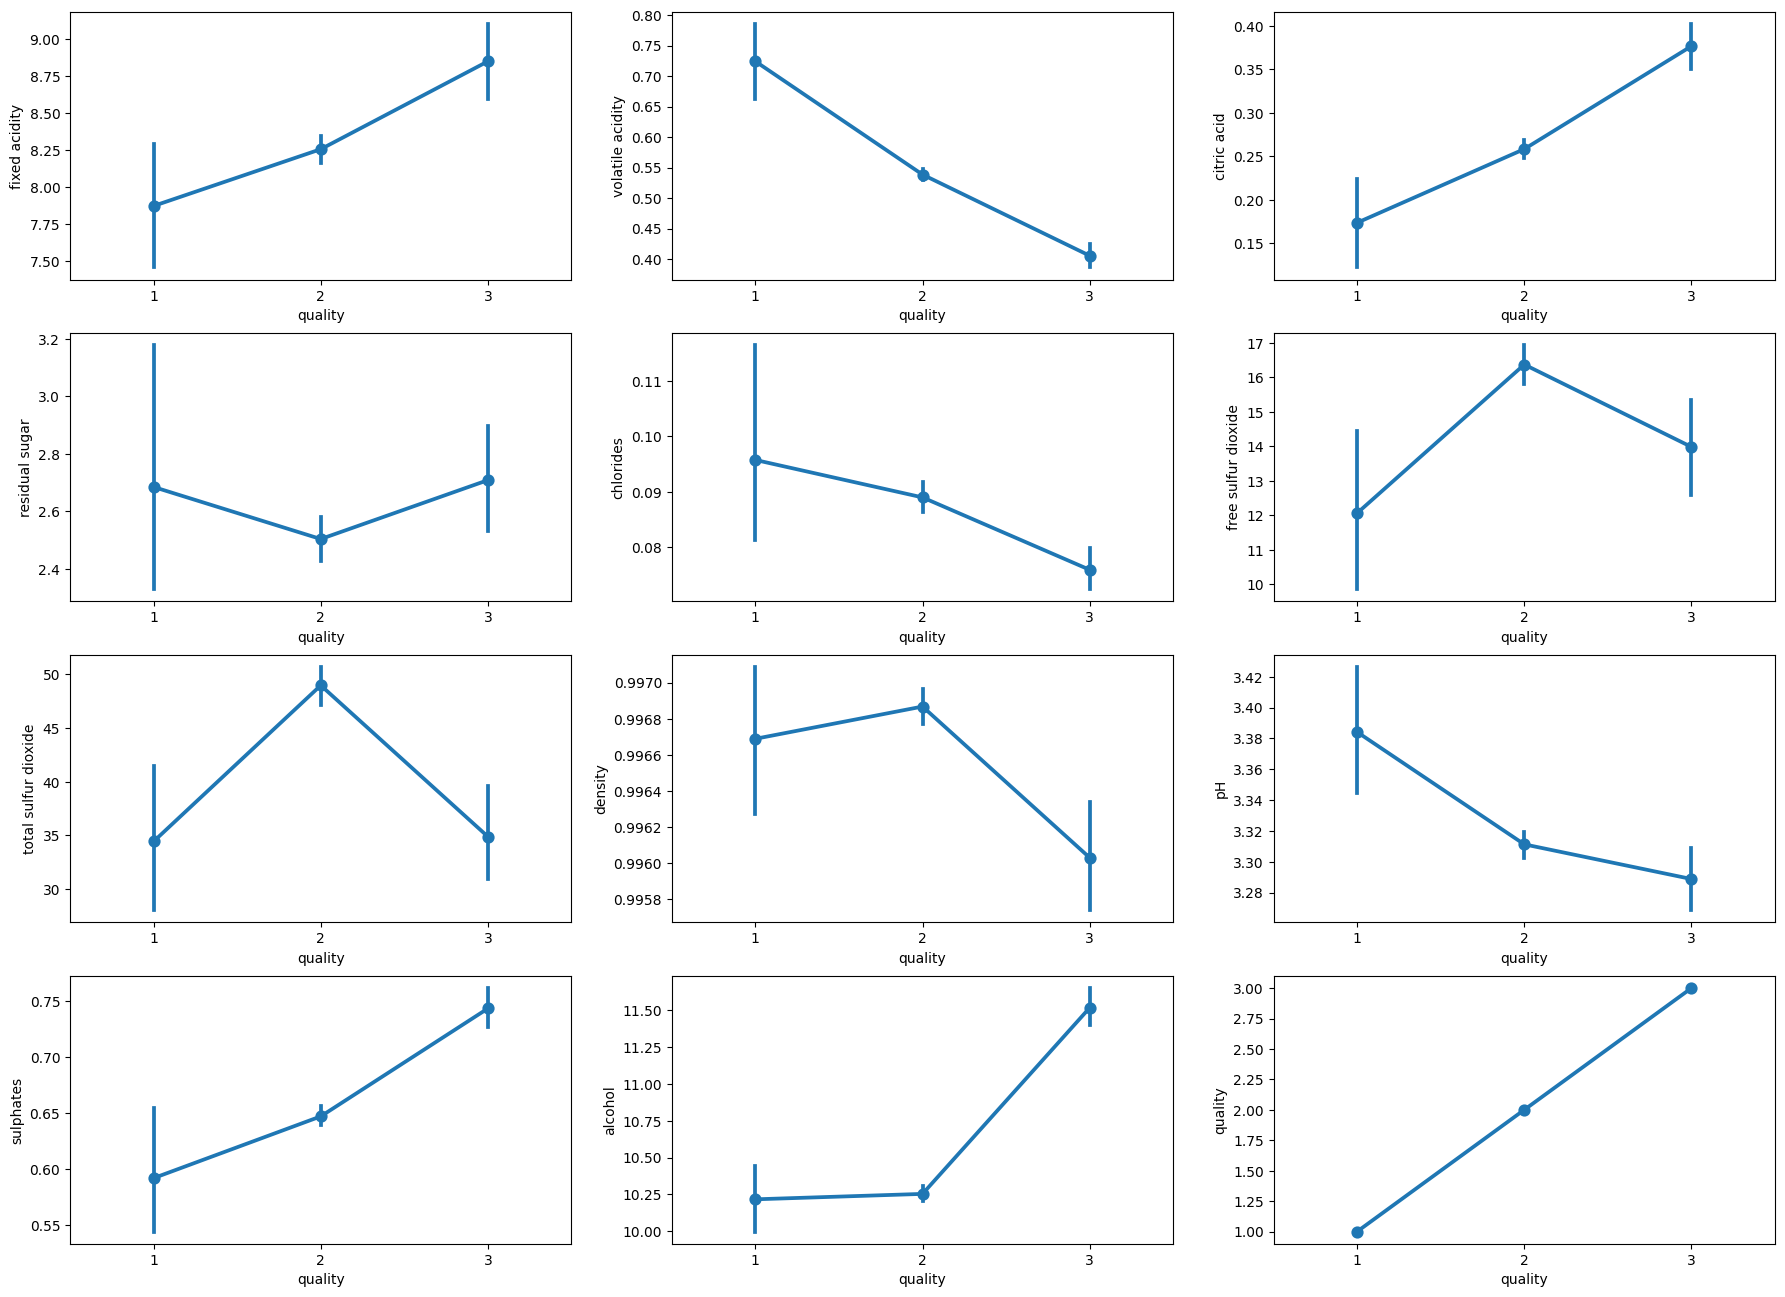

In [36]:
#Point Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"point")

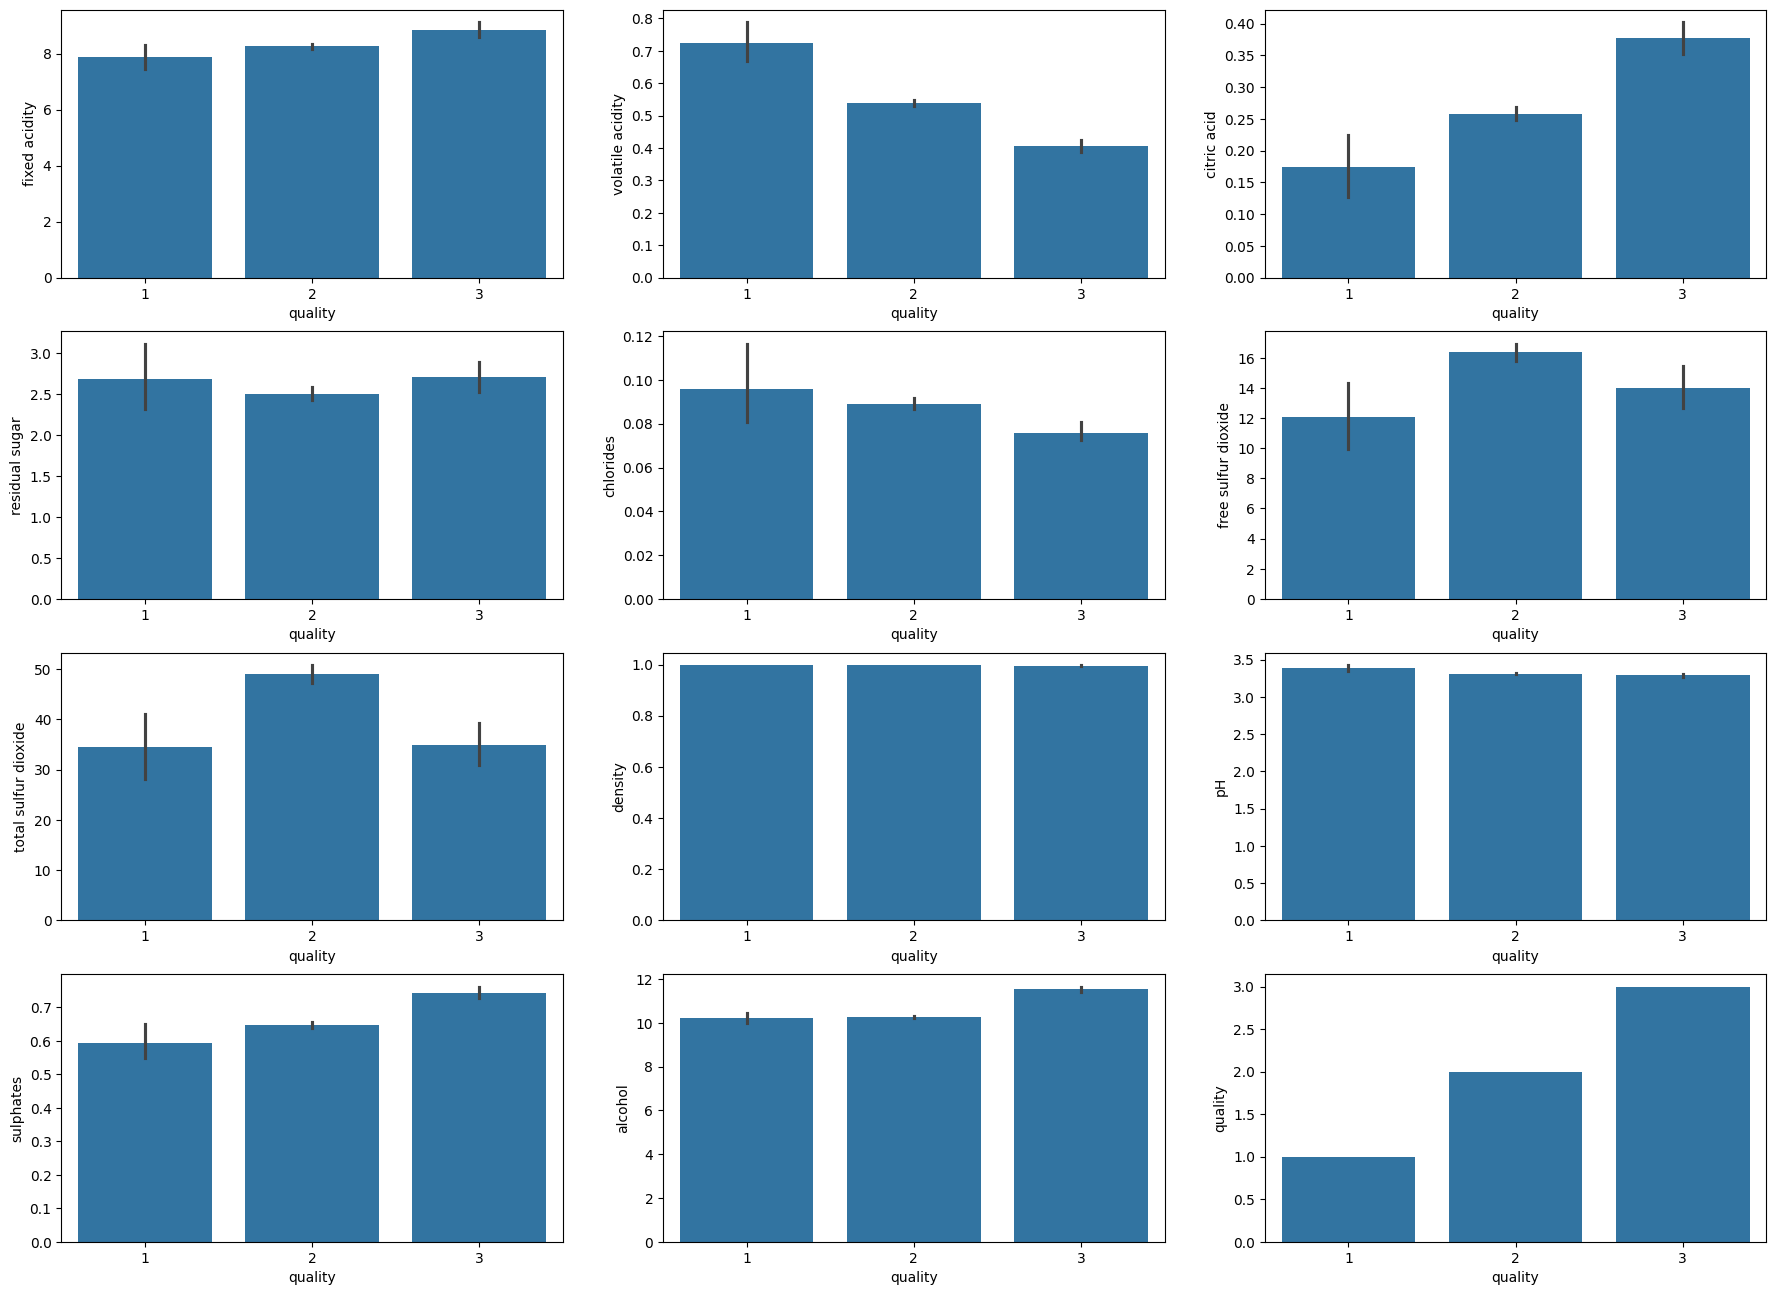

In [37]:
#Bar Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"bar")

In [38]:
X_temp=dataset_temp.drop('quality', axis=1)
y_temp=dataset_temp['quality']
X_temp=StandardScaler().fit_transform(X_temp)

X_train_temp, X_test_temp, y_train_temp, y_test_temp=train_test_split(X_temp, 
                                                                      y_temp,
                                                                      stratify=y_temp,
                                                                      test_size=0.3,
                                                                      random_state=42)


cross_validation_scores_for_various_ml_models(X_temp, y_temp)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.84
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.78
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.81
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.85
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.82
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83


In [39]:
SVM_GridSearch(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

best score: 0.8625
best params: {'C': 1, 'gamma': 1}
classification reports:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.87      0.98      0.92       396
           3       0.80      0.37      0.51        65

    accuracy                           0.86       480
   macro avg       0.56      0.45      0.48       480
weighted avg       0.82      0.86      0.83       480



In [40]:
print('Az örnekleri çoğaltmadan önce')
print('X_train_temp.shape:', X_train_temp.shape)
print('y_train_temp.shape:', y_train_temp.shape)
smote = SMOTE()
X_train_temp, y_train_temp = smote.fit_resample(X_train_temp, y_train_temp)
print('Az örnekleri çoğalttıktan sonra')
print('X_train_temp.shape:', X_train_temp.shape)
print('y_train_temp.shape:', y_train_temp.shape)

SVM_GridSearch(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

Az örnekleri çoğaltmadan önce
X_train_temp.shape: (1119, 11)
y_train_temp.shape: (1119,)
Az örnekleri çoğalttıktan sonra
X_train_temp.shape: (2769, 11)
y_train_temp.shape: (2769,)
best score: 0.8583333333333333
best params: {'C': 10, 'gamma': 10}
classification reports:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.86      0.99      0.92       396
           3       0.95      0.28      0.43        65

    accuracy                           0.86       480
   macro avg       0.60      0.42      0.45       480
weighted avg       0.83      0.86      0.82       480

